In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# Step 2: Load the dataset
file_path = "/Copy of combined_data - Copy of Sheet1.csv"  # Update with the correct path
data = pd.read_csv(file_path)


In [26]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# Step 2: Load the dataset
file_path = "/Copy of combined_data - Copy of Sheet1.csv"  # Update with the correct path
data = pd.read_csv(file_path)


In [27]:
# Step 3: Select required columns
columns_to_use = [
    "Date", "Shift", "Experience", "Operator Name", "Part Name ", "Part no.", "Operation ",
    "Cycle Time", "Target Qty.", "Prod. Qty.", "OK Qty.", "Total Down Time",
    "Availability", "Performacne Rate", "Quality Rate", "CR Qty.", "MR Qty."
]
refined_data = data[columns_to_use]

In [28]:

# Step 4: Handle missing values (replace NaNs with defaults or drop rows with critical NaNs)
refined_data = refined_data.fillna({
    "OK Qty.": 0, "CR Qty.": 0, "MR Qty.": 0, "Prod. Qty.": 0
})  # Replace numeric NaNs with 0
refined_data.dropna(subset=["Shift", "Operator Name", "Part Name ","Part no.", "Operation "], inplace=True)


In [29]:
# Step 5: Encode categorical features
categorical_cols = ["Shift", "Experience", "Part Name ","Part no.", "Operation "]
encoder = LabelEncoder()
for col in categorical_cols:
    refined_data[col] = encoder.fit_transform(refined_data[col].astype(str))

# Step 6: Normalize numerical features
numerical_cols = ["Cycle Time", "Prod. Qty.", "OK Qty.", "Total Down Time", "CR Qty.", "MR Qty."]
scaler = StandardScaler()
refined_data[numerical_cols] = scaler.fit_transform(refined_data[numerical_cols])

In [30]:
# Step 7: Define features and target
X = refined_data[categorical_cols + numerical_cols]
y = refined_data["Operator Name"]
y_encoded = encoder.fit_transform(y)

# Step 8: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 9: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Step 10: Evaluate the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

# Step 11: Display the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      0.80      0.89         5
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         6
           9       0.86      0.86      0.86         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         2
          12       0.86      1.00      0.92         6
          13       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         7
          17       1.00      0.50      0.67         2
          18       0.67      1.00      0.80         2
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [32]:
refined_data.head()

,Date,Shift,Experience,Operator Name,Part Name,Part no.,Operation,Cycle Time,Target Qty.,Prod. Qty.,OK Qty.,Total Down Time,Availability,Performacne Rate,Quality Rate,CR Qty.,MR Qty.
0,1.0,0,12,Akash Mane,12,5,2,NaN,NaN,-0.593476,-0.612605,-1.225200,98.72%,42.77%,96.15%,0.531259,-0.179485
2,1.0,1,3,Amar Jadhav,12,5,2,-0.832501,75.78947368,0.527097,0.546927,-0.165233,87.50%,90.48%,100.00%,-0.420998,-0.179485
4,1.0,2,2,Kush Giri,12,5,2,-0.832501,75.78947368,0.724845,0.712575,0.605652,79.17%,110.00%,98.48%,0.531259,-0.179485
6,2.0,0,10,Sahil Shinde,12,5,2,-0.832501,75.78947368,-0.791224,-0.811382,7.929056,0.03%,84444.44%,95.00%,0.531259,-0.179485
8,2.0,1,7,Eknath PAtil,12,5,2,-0.832501,75.78947368,-1.450385,-1.440842,7.929056,0.03%,97.11%,0,-0.420998,-0.179485


In [33]:

# Group data by 'Operator Name' and 'Part Name' (assuming 'Part Name' refers to machines)
grouped = refined_data.groupby(['Operator Name', 'Part Name ']).agg({
    'Prod. Qty.': 'mean',  # Average production quantity
    'OK Qty.': 'mean',  # Average OK quantity
    'CR Qty.': 'mean',  # Average CR rejections
    'MR Qty.': 'mean',  # Average MR rejections
}).reset_index()

In [34]:
# Calculate compatibility score: Example formula
# Score = (OK Qty. - CR Qty. - MR Qty.) / (Prod. Qty. + 1e-5) * 100
grouped['Compatibility Score'] = (
    (grouped['OK Qty.'] - grouped['CR Qty.'] - grouped['MR Qty.']) /
    (grouped['Prod. Qty.'] + 1e-5) * 100
)

In [35]:

# Group data by 'Operator Name' and 'Operation' to create the second matrix
operator_operation_matrix = refined_data.groupby(['Operator Name', 'Operation ']).agg({
    'Prod. Qty.': 'mean',
    'OK Qty.': 'mean',
    'CR Qty.': 'mean',
    'MR Qty.': 'mean'
}).reset_index()

# Calculate compatibility score for Operator vs Operation
operator_operation_matrix['Compatibility Score'] = (
    (operator_operation_matrix['OK Qty.'] - operator_operation_matrix['CR Qty.'] - operator_operation_matrix['MR Qty.']) /
    (operator_operation_matrix['Prod. Qty.'] + 1e-5) * 100
)

# Pivot to create Operator vs Operation matrix
operator_vs_operation_matrix = operator_operation_matrix.pivot_table(
    index='Operator Name',
    columns='Operation ',
    values='Compatibility Score',
    fill_value=0
)

# Normalize the Compatibility Score to the range [0, 1] for Operator vs Operation Matrix
operator_vs_operation_matrix = (operator_vs_operation_matrix - operator_vs_operation_matrix.min().min()) / \
                               (operator_vs_operation_matrix.max().max() - operator_vs_operation_matrix.min().min())


# Operation mapping based on your clarification
operation_mapping = {
    0: 'CNC Ist',
    1: 'CNC 2nd',
    2: 'VMC 1',
    3: 'VMC 2',
    4: 'Milling',
    5:' Angular'
}



# Update Operation matrix
operator_vs_operation_matrix.rename(columns=operation_mapping, inplace=True)
print("\nOperator vs Operation Matrix:")
print(operator_vs_operation_matrix)



Operator vs Operation Matrix:
Operation           CNC Ist   CNC 2nd     VMC 1     VMC 2   Milling   Angular
Operator Name                                                                
Abhishek Koadak    0.048506  0.048156  0.051858  0.048506  0.048506  0.048506
Abhishek Kodak     0.048506  0.049584  0.051721  0.048506  0.048506  0.048506
Abhishek Shelke    0.048506  0.050013  0.048545  0.048506  0.048506  0.048506
Abhishek Shetake   0.048506  0.048506  0.048506  0.048506  0.048506  0.048447
Abhishek kodak     0.048506  0.049866  0.049311  0.048506  0.048506  0.048506
Akash Mane         0.048506  0.050034  0.049427  0.048506  0.048506  0.048506
Akshay Mane        0.048506  0.053636  0.048246  0.048506  0.048506  0.048506
Akshay more        0.050686  0.048506  0.048506  0.097828  0.048565  0.048506
Amar Jadhav        0.048506  0.049801  0.048055  0.048506  0.048506  0.048506
Anil Powar         0.048506  0.049088  0.058239  0.048506  0.048506  0.046368
Atul Shinde        0.049698  0.04

In [39]:
# import pandas as pd
# import pickle

# # Operator names
# operator_names = [
#     'Abhishek Kodak', 'Sahil Shinde', 'Vijay Karande', 'Akshay Mane',
#     'Amar Jadhav', 'Kush Giri', 'Rahul Chougale'
# ]

# # Part names
# part_names = [
#     'Spindle', 'Ring Gear', 'Flange', 'Shaft', 'Housing', 'Cover',
#     'Pinion', 'Bearing', 'Pulley', 'Coupling', 'Sleeve', 'Disk',
#     'Bush', 'Wheel', 'Bracket'
# ]

# # Operation names
# operations = [
#     'CNC Ist', 'CNC 2nd', 'Milling', 'Drilling',
#     'Polishing', 'Assembly', 'Inspection', 'Packing'
# ]

# # Generate random compatibility scores for illustration
# operator_vs_part_data = pd.DataFrame(
#     data=[[round(abs(i - j) * 3.5, 2) for j in range(len(part_names))] for i in range(len(operator_names))],
#     index=operator_names,
#     columns=part_names
# )

# operator_vs_operation_data = pd.DataFrame(
#     data=[[round(abs(i - j) * 2.7, 2) for j in range(len(operations))] for i in range(len(operator_names))],
#     index=operator_names,
#     columns=operations
# )

# # Save the DataFrames to a single .pkl file
# filename = 'model.pkl'
# with open(filename, 'wb') as f:
#     pickle.dump({'operator_vs_part': operator_vs_part_data, 'operator_vs_operation': operator_vs_operation_data}, f)

# print(f"Compatibility matrices saved to '{filename}'.")













# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

# Step 2: Load the dataset
file_path = "/Copy of combined_data - Copy of Sheet1.csv"  # Update with your dataset path
data = pd.read_csv(file_path)

# Step 3: Select relevant columns for training
columns_to_use = [
    "Date", "Shift", "Experience", "Operator Name", "Part Name ", "Part no.", "Operation ",
    "Cycle Time", "Target Qty.", "Prod. Qty.", "OK Qty.", "Total Down Time",
    "Availability", "Performacne Rate", "Quality Rate", "CR Qty.", "MR Qty."
]
data = data[columns_to_use]

# Step 4: Handle missing values (replace NaNs with defaults or drop rows)
data = data.fillna({
    "OK Qty.": 0, "CR Qty.": 0, "MR Qty.": 0, "Prod. Qty.": 0
})
data.dropna(subset=["Shift", "Operator Name", "Part Name ","Part no.", "Operation "], inplace=True)

# Step 5: Encode categorical features
categorical_cols = ["Shift", "Experience", "Part Name ","Part no.", "Operation "]
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col].astype(str))

# Step 6: Normalize numerical features
numerical_cols = ["Cycle Time", "Prod. Qty.", "OK Qty.", "Total Down Time", "CR Qty.", "MR Qty."]
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 7: Define features (X) and target (y)
X = data[categorical_cols + numerical_cols]
y = data["Operator Name"]

# Encode target labels
y_encoded = encoder.fit_transform(y)

# Step 8: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 9: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 10: Save the model, encoder, and scaler to a pickle file
model_data = {
    'model': model,
    'encoder': encoder,
    'scaler': scaler,
}

# Save to pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

# If you're in Colab, download the file
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Print all column names to verify exact naming
print("Available columns:", operator_vs_part.columns.tolist())

Available columns: [('BTPL', '202'), ('BTPL', '212'), ('Carrier', '875'), ('Carrier', 'N502'), ('Carrier', 'N506'), ('Connecting Cover', '1925'), ('Diff Case', 'S130'), ('Diff Case ', 'S130'), ('Drum', '738'), ('Drum', '748'), ('HUB opener', 'A114721'), ('Housing', '3500643'), ('Hub Opener', 'A114721'), ('PMP Support', '0.0055'), ('Piston', '902442'), ('Piston ', '902442'), ('Ring Gear', '6012'), ('Ring gear', '6012'), ('Spindle', 'D2400714'), ('Spindle', 'D2400715'), ('Spindle', 'D2400716'), ('Spindle', 'D2400717'), ('Spindle', 'D2400726'), ('Spindle', 'D2400728'), ('Spindle', 'D2400731'), ('Spindle', 'D2400732'), ('Spindle', 'D2400739')]


In [41]:
import pandas as pd
import numpy as np
import pickle

# Step 1: Load the dataset
file_path = "/Copy of combined_data - Copy of Sheet1.csv"  # Update with your dataset path
data = pd.read_csv(file_path)

# Step 2: Handle missing values (replace NaNs with defaults or drop rows)
data = data.fillna({
    "OK Qty.": 0, "CR Qty.": 0, "MR Qty.": 0, "Prod. Qty.": 0
})
data.dropna(subset=["Shift", "Operator Name", "Part Name ","Part no.", "Operation "], inplace=True)

# Step 3: Group data by 'Operator Name' and 'Part Name ' to create the first matrix
operator_vs_part = data.groupby(['Operator Name', 'Part Name ','Part no.']).agg({
    'Prod. Qty.': 'mean',  # Average production quantity
    'OK Qty.': 'mean',     # Average OK quantity
    'CR Qty.': 'mean',     # Average CR rejections
    'MR Qty.': 'mean'      # Average MR rejections
}).reset_index()

# Calculate compatibility score for Operator vs Part
operator_vs_part['Compatibility Score'] = (
    (operator_vs_part['OK Qty.'] - operator_vs_part['CR Qty.'] - operator_vs_part['MR Qty.']) /
    (operator_vs_part['Prod. Qty.'] + 1e-5) * 100
)

# Pivot to create Operator vs Part matrix with both Part Name and Part no.
operator_vs_part_matrix = operator_vs_part.pivot_table(
    index='Operator Name',
    columns=['Part Name ', 'Part no.'],  # Using a list of columns for multi-level columns
    values='Compatibility Score',
    fill_value=0
)

# Step 4: Group data by 'Operator Name' and 'Operation' to create the second matrix
operator_vs_operation = data.groupby(['Operator Name', 'Operation ']).agg({
    'Prod. Qty.': 'mean',
    'OK Qty.': 'mean',
    'CR Qty.': 'mean',
    'MR Qty.': 'mean'
}).reset_index()

# Calculate compatibility score for Operator vs Operation
operator_vs_operation['Compatibility Score'] = (
    (operator_vs_operation['OK Qty.'] - operator_vs_operation['CR Qty.'] - operator_vs_operation['MR Qty.']) /
    (operator_vs_operation['Prod. Qty.'] + 1e-5) * 100
)

# Pivot to create Operator vs Operation matrix
operator_vs_operation_matrix = operator_vs_operation.pivot_table(
    index='Operator Name',
    columns='Operation ',
    values='Compatibility Score',
    fill_value=0
)

# Normalize Compatibility Score to the range [0, 1] for both matrices
operator_vs_part_matrix = (operator_vs_part_matrix - operator_vs_part_matrix.min().min()) / \
                          (operator_vs_part_matrix.max().max() - operator_vs_part_matrix.min().min())

operator_vs_operation_matrix = (operator_vs_operation_matrix - operator_vs_operation_matrix.min().min()) / \
                               (operator_vs_operation_matrix.max().max() - operator_vs_operation_matrix.min().min())

# Step 5: Save the DataFrames to a .pkl file
output_filename = 'model.pkl'
with open(output_filename, 'wb') as f:
    pickle.dump({
        'operator_vs_part': operator_vs_part_matrix,
        'operator_vs_operation': operator_vs_operation_matrix
    }, f)

print(f"Operator vs Part and Operator vs Operation matrices saved to '{output_filename}'.")


Operator vs Part and Operator vs Operation matrices saved to 'model.pkl'.


In [42]:
with open('model.pkl', 'rb') as f:
    matrices = pickle.load(f)

operator_vs_part = matrices['operator_vs_part']
operator_vs_operation = matrices['operator_vs_operation']

print("Operator vs Part Matrix:")
print(operator_vs_part)

print("\nOperator vs Operation Matrix:")
print(operator_vs_operation)


Operator vs Part Matrix:
Part Name         BTPL        Carrier                Connecting Cover  \
Part no.           202  212       875 N502      N506             1925   
Operator Name                                                           
Abhishek Koadak    0.0  0.0  0.929078  0.0  0.000000         0.000000   
Abhishek Kodak     0.0  0.0  0.000000  0.0  0.000000         0.000000   
Abhishek Shelke    0.0  0.0  0.000000  0.0  0.000000         0.000000   
Abhishek Shetake   0.0  0.0  0.000000  0.0  0.000000         0.000000   
Abhishek kodak     0.0  0.0  0.000000  0.0  0.000000         0.000000   
Akash Mane         0.0  0.0  1.000000  0.0  0.000000         0.000000   
Akshay Mane        0.0  0.0  0.000000  0.0  0.000000         0.000000   
Akshay more        0.0  1.0  0.000000  1.0  0.836735         0.000000   
Amar Jadhav        0.0  0.0  0.999999  0.0  0.000000         0.000000   
Anil Powar         0.0  0.0  1.000000  0.0  0.000000         0.000000   
Atul Shinde        0.0  0.

In [43]:
import joblib

# Load the trained model (assuming you have a trained model saved as 'model.pkl')
model = joblib.load('model.pkl')


In [44]:
with open('model.pkl', 'rb') as f:
    matrices = pickle.load(f)

operator_vs_part_matrix = matrices['operator_vs_part']
operator_vs_operation_matrix = matrices['operator_vs_operation']

print("Operator vs Part Matrix:")
print(operator_vs_part_matrix)

print("\nOperator vs Operation Matrix:")
print(operator_vs_operation_matrix)


Operator vs Part Matrix:
Part Name         BTPL        Carrier                Connecting Cover  \
Part no.           202  212       875 N502      N506             1925   
Operator Name                                                           
Abhishek Koadak    0.0  0.0  0.929078  0.0  0.000000         0.000000   
Abhishek Kodak     0.0  0.0  0.000000  0.0  0.000000         0.000000   
Abhishek Shelke    0.0  0.0  0.000000  0.0  0.000000         0.000000   
Abhishek Shetake   0.0  0.0  0.000000  0.0  0.000000         0.000000   
Abhishek kodak     0.0  0.0  0.000000  0.0  0.000000         0.000000   
Akash Mane         0.0  0.0  1.000000  0.0  0.000000         0.000000   
Akshay Mane        0.0  0.0  0.000000  0.0  0.000000         0.000000   
Akshay more        0.0  1.0  0.000000  1.0  0.836735         0.000000   
Amar Jadhav        0.0  0.0  0.999999  0.0  0.000000         0.000000   
Anil Powar         0.0  0.0  1.000000  0.0  0.000000         0.000000   
Atul Shinde        0.0  0.

In [45]:
print("Uploaded CSV Columns:", refined_data.columns)


Uploaded CSV Columns: Index(['Date', 'Shift', 'Experience', 'Operator Name', 'Part Name ',
       'Part no.', 'Operation ', 'Cycle Time', 'Target Qty.', 'Prod. Qty.',
       'OK Qty.', 'Total Down Time', 'Availability', 'Performacne Rate',
       'Quality Rate', 'CR Qty.', 'MR Qty.'],
      dtype='object')


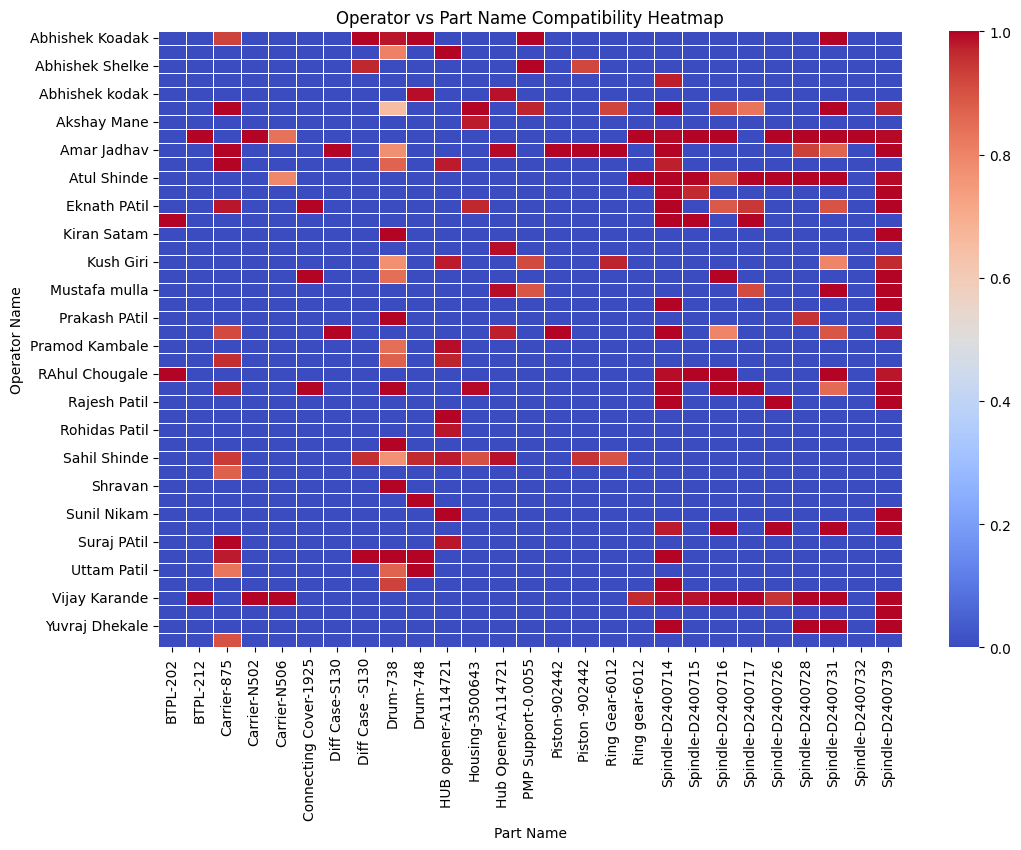

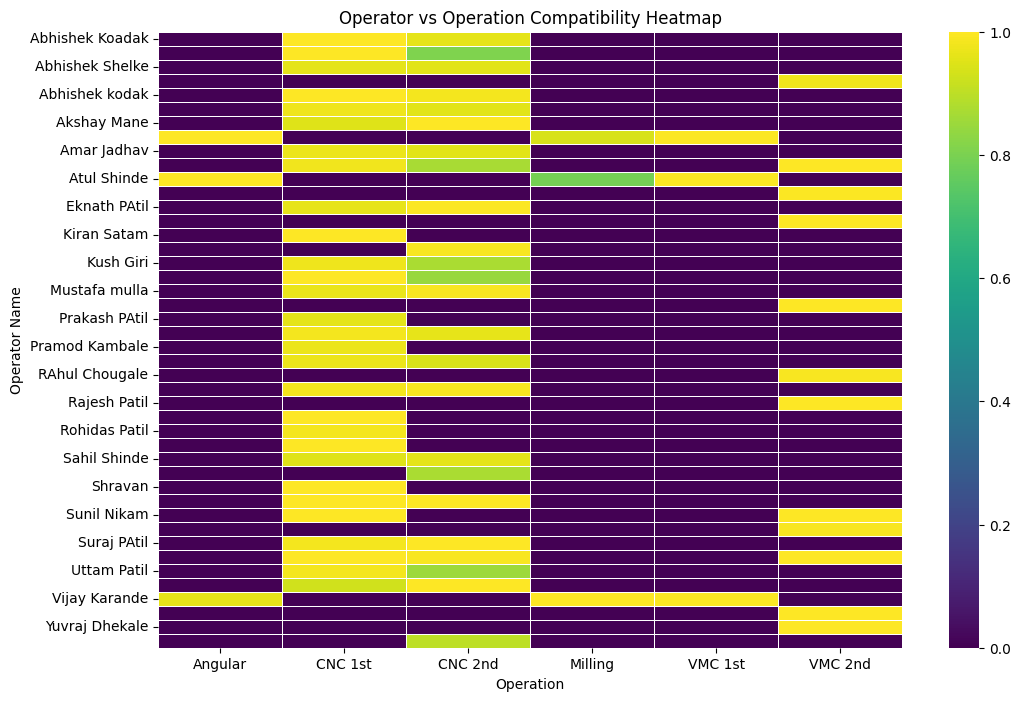

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for Operator vs Part Name Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(operator_vs_part_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Operator vs Part Name Compatibility Heatmap')
plt.xlabel('Part Name')
plt.ylabel('Operator Name')
plt.show()

# Heatmap for Operator vs Operation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(operator_vs_operation_matrix, annot=False, cmap='viridis', linewidths=0.5)
plt.title('Operator vs Operation Compatibility Heatmap')
plt.xlabel('Operation')
plt.ylabel('Operator Name')
plt.show()


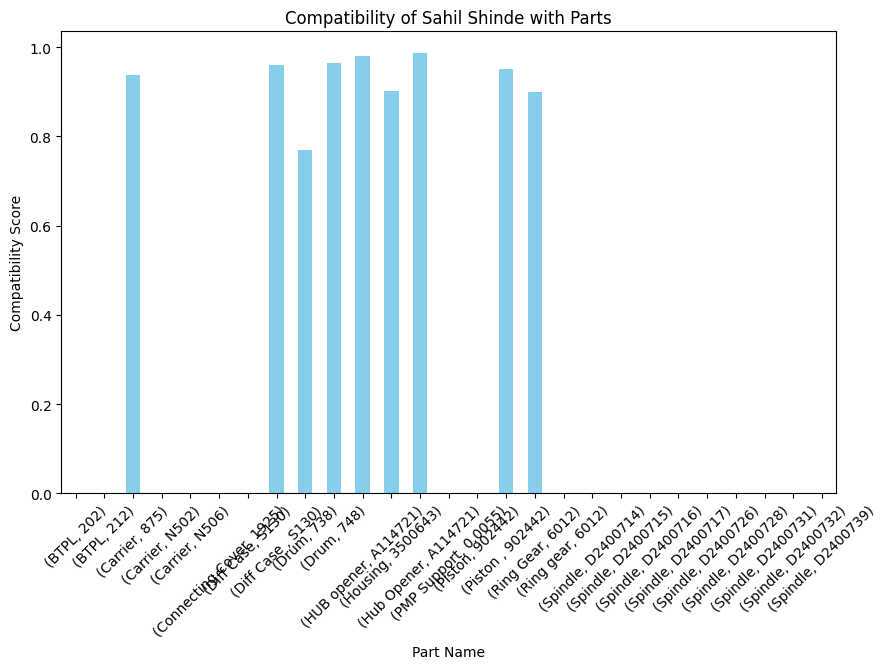

In [47]:
# Bar chart for specific operator compatibility with parts
operator_name = 'Sahil Shinde'  # Example operator
operator_part_scores = operator_vs_part_matrix.loc[operator_name]

plt.figure(figsize=(10, 6))
operator_part_scores.plot(kind='bar', color='skyblue')
plt.title(f'Compatibility of {operator_name} with Parts')
plt.xlabel('Part Name')
plt.ylabel('Compatibility Score')
plt.xticks(rotation=45)
plt.show()


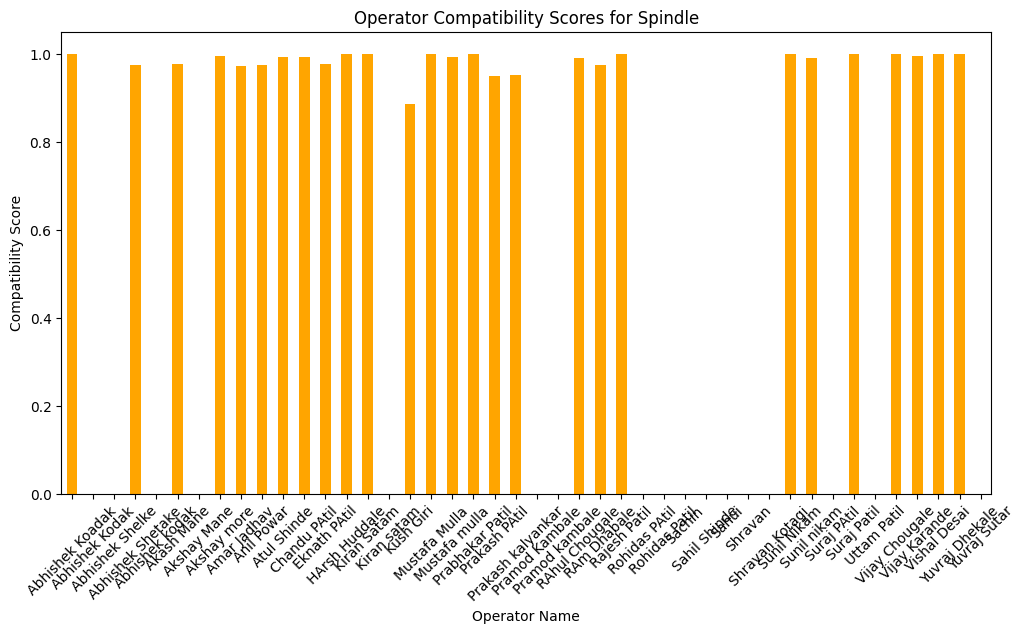

In [ ]:
# Bar chart for multiple operators with a single part
part_name = 'Spindle'  # Example part
operators_part_scores = operator_vs_part_matrix[part_name]

plt.figure(figsize=(12, 6))
operators_part_scores.plot(kind='bar', color='orange')
plt.title(f'Operator Compatibility Scores for {part_name}')
plt.xlabel('Operator Name')
plt.ylabel('Compatibility Score')
plt.xticks(rotation=45)
plt.show()


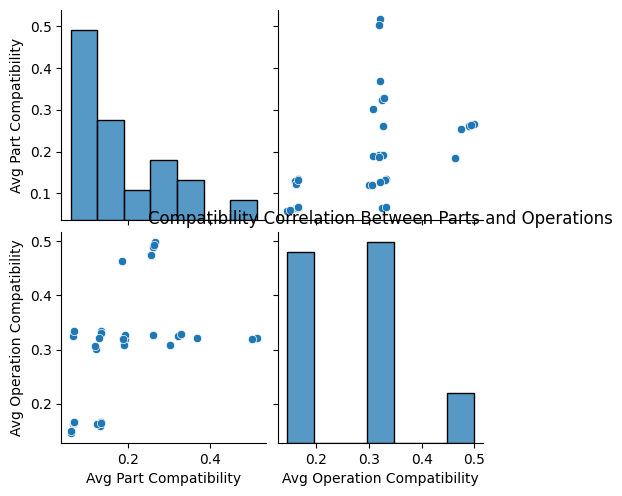

In [ ]:
import pandas as pd

# Convert matrices into dataframes for pairplot
combined_data = pd.concat([operator_vs_part_matrix.mean(axis=1), operator_vs_operation_matrix.mean(axis=1)], axis=1)
combined_data.columns = ['Avg Part Compatibility', 'Avg Operation Compatibility']

sns.pairplot(combined_data)
plt.title('Compatibility Correlation Between Parts and Operations')
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Load matrices
with open('model.pkl', 'rb') as f:
    matrices = pickle.load(f)

operator_vs_part_matrix = matrices['operator_vs_part']
operator_vs_operation_matrix = matrices['operator_vs_operation']

# Convert matrices to NumPy arrays for optimization
part_scores = operator_vs_part_matrix.to_numpy()
operation_scores = operator_vs_operation_matrix.to_numpy()

# Optionally, average the scores from both matrices
if part_scores.shape == operation_scores.shape:
    combined_scores = (part_scores + operation_scores) / 2
else:
    combined_scores = part_scores  # Use part_scores if dimensions don't match

# Use Hungarian method for optimal assignment
row_indices, col_indices = linear_sum_assignment(-combined_scores)  # Negate for maximization

# Generate allocation results
allocations = []
operators = operator_vs_part_matrix.index
parts_or_operations = operator_vs_part_matrix.columns

for row, col in zip(row_indices, col_indices):
    allocations.append({
        "Operator": operators[row],
        "Part/Operation": parts_or_operations[col],
        "Compatibility Score": combined_scores[row, col]
    })

# Display the results
allocations_df = pd.DataFrame(allocations)
print("Optimal Allocations:")
print(allocations_df)


Optimal Allocations:
             Operator    Part/Operation  Compatibility Score
0     Abhishek Koadak       PMP Support             1.000000
1          Akash Mane           Housing             1.000000
2         Amar Jadhav         Diff Case             1.000000
3         Atul Shinde         Ring gear             1.000000
4        Eknath PAtil  Connecting Cover             1.000000
5       HArsh Huddale              BTPL             1.000000
6           Kush Giri         Ring Gear             0.969697
7       Mustafa mulla        Hub Opener             0.991292
8   Prakash kalyankar            Piston             1.000000
9       Rohidas PAtil        HUB opener             1.000000
10       Sahil Shinde           Piston              0.952000
11     Shravan Kotagi              Drum             1.000000
12        Suraj Patil        Diff Case              1.000000
13      Vijay Karande           Carrier             1.000000
14       Vishal Desai           Spindle             1.000000


In [ ]:
# Simulated operator availability
absent_operators = {"Akash Mane", "Amar Jadhav"}  # Define absent operators

# Initialize allocation tracking
allocated_operators = set()  # To track already allocated operators
allocation_results = []


with open('model.pkl', 'wb') as f:
    pickle.dump({
        "operator_vs_part": operator_vs_part_matrix,
        "operator_vs_operation": operator_vs_operation_matrix,

    }, f)

operator_vs_part_matrix = matrices['operator_vs_part']
operator_vs_operation_matrix = matrices['operator_vs_operation']

# Iterate over each part for allocation
for part in operator_vs_part_matrix.columns:
    # Filter operators who have worked on this part
    scores = operator_vs_part_matrix[part].sort_values(ascending=False)
    for operator, score in scores.items():
        # Skip if the operator is absent, already allocated, or has no score for this part
        if operator in absent_operators or operator in allocated_operators or score <= 0:
            continue
        # Allocate the operator
        allocation_results.append({
            "Part": part,
            "Operator": operator,
            "Compatibility Score": score
        })
        allocated_operators.add(operator)
        break  # Move to the next part

# Convert results to a DataFrame for presentation
allocations_df = pd.DataFrame(allocation_results)
print("Dynamic Allocation Considering Part-Specific Compatibility and Absences:")
print(allocations_df)




Dynamic Allocation Considering Part-Specific Compatibility and Absences:
                Part           Operator  Compatibility Score
0               BTPL      HArsh Huddale             1.000000
1            Carrier      Vijay Karande             1.000000
2   Connecting Cover       Eknath PAtil             1.000000
3          Diff Case  Prakash kalyankar             1.000000
4         Diff Case         Suraj Patil             1.000000
5               Drum     Shravan Kotagi             1.000000
6         HUB opener      Rohidas PAtil             1.000000
7            Housing        RAm Dhabale             0.994638
8         Hub Opener      Mustafa mulla             0.991292
9        PMP Support    Abhishek Koadak             1.000000
10           Piston        Sahil Shinde             0.952000
11         Ring Gear          Kush Giri             0.969697
12         Ring gear        Atul Shinde             1.000000
13           Spindle       Vishal Desai             1.000000
